<a href="https://colab.research.google.com/github/Alderan7/01_REP_INICIAL-/blob/master/Copia_de_deepfakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinventa la película: Crea tu propio Deep Fake**

Bienvenido al ejercicio práctico del taller **Reinventa la película** de **Saturdays.AI** y **Epitech**.

**Descripción del problema**

Crea tu propio Deepfake transfiriendo las expresiones faciales de un video a una imagen estática.

**Competencias**

Al final de esta práctica serás capaz de manejar notebooks de Python, ejecutar modelos de inteligencia artificial y generar Deepfakes preprocesando previamente los datos.

En esta práctica vamos a realizar una demo del artículo [First Order Motion Model for Image Animation](https://aliaksandrsiarohin.github.io/first-order-model-website/) de Aliaksandr Siarohin. En concreto, utilizaremos técnicas de IA para generar un Deepfake trasladando las expresiones faciales de un video a una imágen estática.

Lo primero que haremos será configurar el entorno de ejecución. Este representará la máquina sobre la cual ejecutaremos nuestros modelos. Debido a que trabajaremos con modelos muy grandes, normalmente será más conveniente trabajar sobre una GPU (gráfica) que sobre una CPU debido a su potecia de cálculo.

Para cambiar tu entorno de ejecución a GPU selecciona en la parte superior del notebook la opción **Entorno de ejecución** y **Cambiar tipo de entorno de ejecución**. En el desplegable **Acelerador por hardware** selecciona la opción **GPU** y dale a **Guardar**. Ya tienes todo listo para comenzar a trabajar.

Lo primero que haremos será clonar el repositorio del artículo original. De este modo tendremos acceso al código que nos permitirá llevar a cabo nuestro Deepfake. Para ello deberás ejecutar las siguientes celdas.

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model

Cloning into 'first-order-model'...
remote: Enumerating objects: 249, done.
remote: Total 249 (delta 0), reused 0 (delta 0), pack-reused 249
Receiving objects: 100% (249/249), 72.12 MiB | 36.45 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [ ]:
cd first-order-model

/content/first-order-model


A continuación deberás asociar tu cuenta de Google Drive a este notebook para así alojar el material que utilizarás para construir tu Deepfake. Al ejecutar la siguiente celda deberás aceptar el acceso, momento en el que recibirás un código que deberás introducir para finalizar la sincronización.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Descarga y añade [esta carpeta](https://drive.google.com/drive/folders/1kZ1gCnpfU0BnpdU47pLM_TQ6RypDDqgw) a tu unidad de Drive. La carpeta contiene distintos videos e imágenes de ejemplo para generar un primer Deepfake controlado. Será la misma carpeta en la que más adelante podrás subir tu propio material.

El siguiente paso será importar el video y la imagen que utilizaremos para generar el Deepfake. Puedes probar distintas combinaciones modificando las rutas de las variables *source_image* (imagen objetivo) y *reader* (video modelo). En la carpeta que has descargado anteriormente podrás ver todas las posibles combinaciones que puedes realizar.

Tras ejecutar la celda verás por pantalla el video y la imagen escogida.

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/02.png')
reader = imageio.get_reader('/content/gdrive/My Drive/first-order-motion-model/04.mp4')

#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]

fps = reader.get_meta_data()['fps']
driving_video = []

try:
    for im in reader:
        driving_video.append(im)
except RuntimeError:
    pass
reader.close()

driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]


def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

Carga el modelo preentrenado de IA en el notebook (puede tardar unos segundos).

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='/content/gdrive/My Drive/first-order-motion-model/vox-cpk.pth.tar')

A continuación se extraerán los rasgos del video y se trasladarán a la imagen objetivo. Tras ejectuar la celda podrás ver el resultado final.

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
HTML(display(source_image, driving_video, predictions).to_html5_video())

En la carpeta que verás a la izquierda de la pantalla verás que se ha generado un archivo de nombre *generated.mp4*. Este archivo alojará el resultado del Deepfake. Puedes descargártelo para compartirlo con tus amigos.

Antes de continuar con la práctica prueba de realizar distintas combinaciones con el material proporcionado en la carpeta de muestra.

# Utiliza tus propios datos

Hasta ahora hemos experimentado con las opciones que venían por defecto en la carpeta general. En esta sección aprenderás como puedes utilizar tus propios videos e imágenes para generar un Deepfake personalizado.

Lo primero será obtener la imagen a la que querrás transferir las expresiones. Para ello puedes seleccionar cualquier imagen y con un programa de edición (Photoshop, GIMP, Paint, ...) recortar únicamente la parte de la cabeza.

Una vez tengas la imagen guárdala como *image_test.png* en la carpeta de Drive que has utilizado en el apartado anterior.

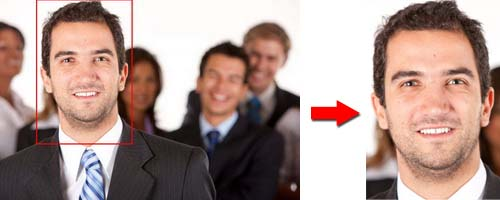

El siguiente paso será obtener el video del cual extraerás las expresiones. Obtener un vídeo donde solo aparezca la cara de la persona puede resultar complicado. Por este motivo para obtener el video fuente puedes optar por dos opciones:
- Grábate a ti mismo hablando, gesticulando o parpadeando. Trata de que en el video solo aparezca tu cara y el fondo sea lo más homogéneo posible (por ejemplo, ponte contra una pared).

- Utiliza algún software de grabación o de edición de video para obtener un clip en el que solo aparezca la cara de la persona. Los ejemplos más sencillos son aquellos en los que la persona es entrevistada, está dando un discurso o habla hacia la cámara sin moverse mucho.

Puede utilizar como ejemplo [este vídeo](https://www.youtube.com/watch?v=zd2Ey5HDNY8) del divulgador Javier Santaolalla. Trata de extraer un video en el que se solo aparezca su cara (por ejemplo, del minuto 2:52 a 3:02, añadiendo algún tipo de recorte con software de grabación o edición).

El vídeo que utilices debe tener una duración mínima de 8 segundos y tener unas dimensiones lo más cuadradas posibles. Sube tu vídeo a la carpeta de material con el nombre *video_test.mov* (puedes utilizar otras extensiones como mp4).

En la siguiente celda preprocesaremos el vídeo. Indica tras el parámetro -t el número de segundos de vídeo que quieres utilizar (por defecto 8 segundos). Si tu vídeo no está en formato mov modifica la extensión en la ruta que aparece previamente al parámetro -ss.

In [ ]:
!ffmpeg -i /content/gdrive/My\ Drive/first-order-motion-model/video_test.mov -ss 00:00:00 -t 00:00:10 -async 1 hinton.mp4

Finalmente ejecutando la siguiente celda generarás el Deepfake (puede tardar unos minutos).

In [ ]:
source_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/image_test.png')
driving_video = imageio.mimread('hinton.mp4', memtest=False)

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

imageio.mimsave('../generated_custom.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
HTML(display(source_image, driving_video, predictions).to_html5_video())

En la pestaña de la izquierda encontrarás el Deepfake generado con el nombre *generated_custom.mp4* disponible para descargártelo.

# Siguientes pasos

Ahora que ya dominas la creación de Deepfakes puedes mejorar incluso más el resultado. Nota que en este proceso se ha perdido el audio del vídeo. Utiliza algún software de edición de vídeo para añadirlo (a partir del vídeo original) para que tu resultado sea mucho más realista.

Pon a prueba el modelo de IA en situaciones extremas:
* ¿Qué ocurre cuando la dirección de la cara no coincide entre video e imagen?
* ¿Qué ocurre si en el video no aparece solo la cara, sino que tiene un zoom más alejado?
* ¿Qué ocurre si en la imagen objetivo aparece más de una cara?

Experimenta con distintos vídeos e imágenes y trata de obtener un Deepfake que sea indistinguible de la realidad. ¿Serás capaz de obtener el mejor resultado del taller?

Ponte manos a la obra y **#reinventalapelicula**.